### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import scipy.stats as stats
from scipy.stats import shapiro

from warnings import filterwarnings
filterwarnings("ignore")

### Load the required Dataset

In [2]:
sales = pd.read_excel("Sales_Data.xlsx")

In [3]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2,2871,2018-02-24 00:00:00,828.0,Shipped,Motorcycles,95.0,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121.0,34.0,81.35,5,2765.9,2018-05-07 00:00:00,757.0,Shipped,Motorcycles,95.0,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134.0,41.0,94.74,2,3884.34,2018-07-01 00:00:00,703.0,Shipped,Motorcycles,95.0,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6,3746.7,2018-08-25 00:00:00,649.0,Shipped,Motorcycles,95.0,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168.0,36.0,96.66,1,3479.76,2018-10-28 00:00:00,586.0,Shipped,Motorcycles,95.0,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


### Dataset

In [4]:
sales.shape
print("The number of rows are:", sales.shape[0],"and the number of columns are:", sales.shape[1])

The number of rows are: 23019 and the number of columns are: 20


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23019 entries, 0 to 23018
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           23019 non-null  float64
 1   QUANTITYORDERED       23019 non-null  float64
 2   PRICEEACH             23019 non-null  float64
 3   ORDERLINENUMBER       23019 non-null  object 
 4   SALES                 23019 non-null  object 
 5   ORDERDATE             23019 non-null  object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   float64
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   float64
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE         

In [9]:
sales['SALES'] = pd.to_numeric(sales['SALES'])

ValueError: Unable to parse string "<---" at position 2747

### Check for Missing Values

In [9]:
sales.isnull().sum()

ORDERNUMBER                 0
QUANTITYORDERED             0
PRICEEACH                   0
ORDERLINENUMBER             0
SALES                       0
ORDERDATE                   0
DAYS_SINCE_LASTORDER    20272
STATUS                  20272
PRODUCTLINE             20272
MSRP                    20272
PRODUCTCODE             20272
CUSTOMERNAME            20272
PHONE                   20272
ADDRESSLINE1            20272
CITY                    20272
POSTALCODE              20272
COUNTRY                 20272
CONTACTLASTNAME         20272
CONTACTFIRSTNAME        20272
DEALSIZE                20272
dtype: int64

### Descriptive Statistics

In [10]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,23019.0,1224.425837,3326.247219,0.050044,0.065847,0.071115,0.078139,10425.00
QUANTITYORDERED,23019.0,4.582771,11.730229,0.400000,0.425532,0.448864,0.479532,97.00
PRICEEACH,23019.0,13.101817,35.499543,0.956621,1.128943,1.183816,1.256779,252.87
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.000000,1077.000000,1761.000000,2436.500000,3562.00
MSRP,2747.0,100.691664,40.114802,33.000000,68.000000,99.000000,124.000000,214.00


### Shapiro Wilk Test

In [11]:
print("QUANTITYORDERED")
stat, p = shapiro(sales['QUANTITYORDERED'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

QUANTITYORDERED
Statistics=0.397, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
print("PRICEEACH")
stat, p = shapiro(sales['PRICEEACH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

PRICEEACH
Statistics=0.386, p=0.000
Sample does not look Gaussian (reject H0)


In [13]:
print("SALES")
stat, p = shapiro(sales['SALES'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

SALES


TypeError: '<' not supported between instances of 'str' and 'int'

In [14]:
print("DAYS_SINCE_LASTORDER")
stat, p = shapiro(sales['DAYS_SINCE_LASTORDER'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

DAYS_SINCE_LASTORDER
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [15]:
print("MSRP")
stat, p = shapiro(sales['MSRP'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

MSRP
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


### Inter Quartile Range

In [16]:
Q1 = sales.quantile(0.25)
Q3 = sales.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ORDERNUMBER                0.012291
QUANTITYORDERED            0.054000
PRICEEACH                  0.127836
DAYS_SINCE_LASTORDER    1359.500000
MSRP                      56.000000
dtype: float64


### Outlier Detection 

In [17]:
Q1 = sales['QUANTITYORDERED'].quantile(0.25)
Q3 = sales['QUANTITYORDERED'].quantile(0.75)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('First Quartile: ', Q1)
print('Third Quartile: ', Q3)

print()

print('Lower outliers in quantity ordered: ', L_outliers)
print('Upper outliers in quantity ordered: ', U_outliers)

First Quartile:  0.425531914893617
Third Quartile:  0.47953216374269003

Lower outliers in quantity ordered:  0.34453154162000754
Upper outliers in quantity ordered:  0.5605325370162996


In [18]:
Q1 = sales['PRICEEACH'].quantile(0.25)
Q3 = sales['PRICEEACH'].quantile(0.75)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('First Quartile: ', Q1)
print('Third Quartile: ', Q3)

print()

print('Lower outliers in price each: ', L_outliers)
print('Upper outliers in price each: ', U_outliers)

First Quartile:  1.1289434902252304
Third Quartile:  1.2567792951021919

Lower outliers in price each:  0.9371897829097883
Upper outliers in price each:  1.448533002417634


In [19]:
Q1 = sales['SALES'].quantile(0.25)
Q3 = sales['SALES'].quantile(0.75)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('First Quartile: ', Q1)
print('Third Quartile: ', Q3)

print()

print('Lower outliers in sales: ', L_outliers)
print('Upper outliers in sales: ', U_outliers)

TypeError: '<' not supported between instances of 'str' and 'int'

In [20]:
Q1 = sales['DAYS_SINCE_LASTORDER'].quantile(0.25)
Q3 = sales['DAYS_SINCE_LASTORDER'].quantile(0.75)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('First Quartile: ', Q1)
print('Third Quartile: ', Q3)

print()

print('Lower outliers in days since last order: ', L_outliers)
print('Upper outliers in days since last order: ', U_outliers)

First Quartile:  1077.0
Third Quartile:  2436.5

Lower outliers in days since last order:  -962.25
Upper outliers in days since last order:  4475.75


In [21]:
Q1 = sales['MSRP'].quantile(0.25)
Q3 = sales['MSRP'].quantile(0.75)

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('First Quartile: ', Q1)
print('Third Quartile: ', Q3)

print()

print('Lower outliers in msrp: ', L_outliers)
print('Upper outliers in msrp: ', U_outliers)

First Quartile:  68.0
Third Quartile:  124.0

Lower outliers in msrp:  -16.0
Upper outliers in msrp:  208.0


### Exploratory Data Analysis

### Univariate Analysis

skew value of quantity ordered is 2.7339533555866087
skew value of price each is 3.167006439640057
skew value of days since last order is -0.0029834081469109694
skew value of msrp is 0.5756463776894685


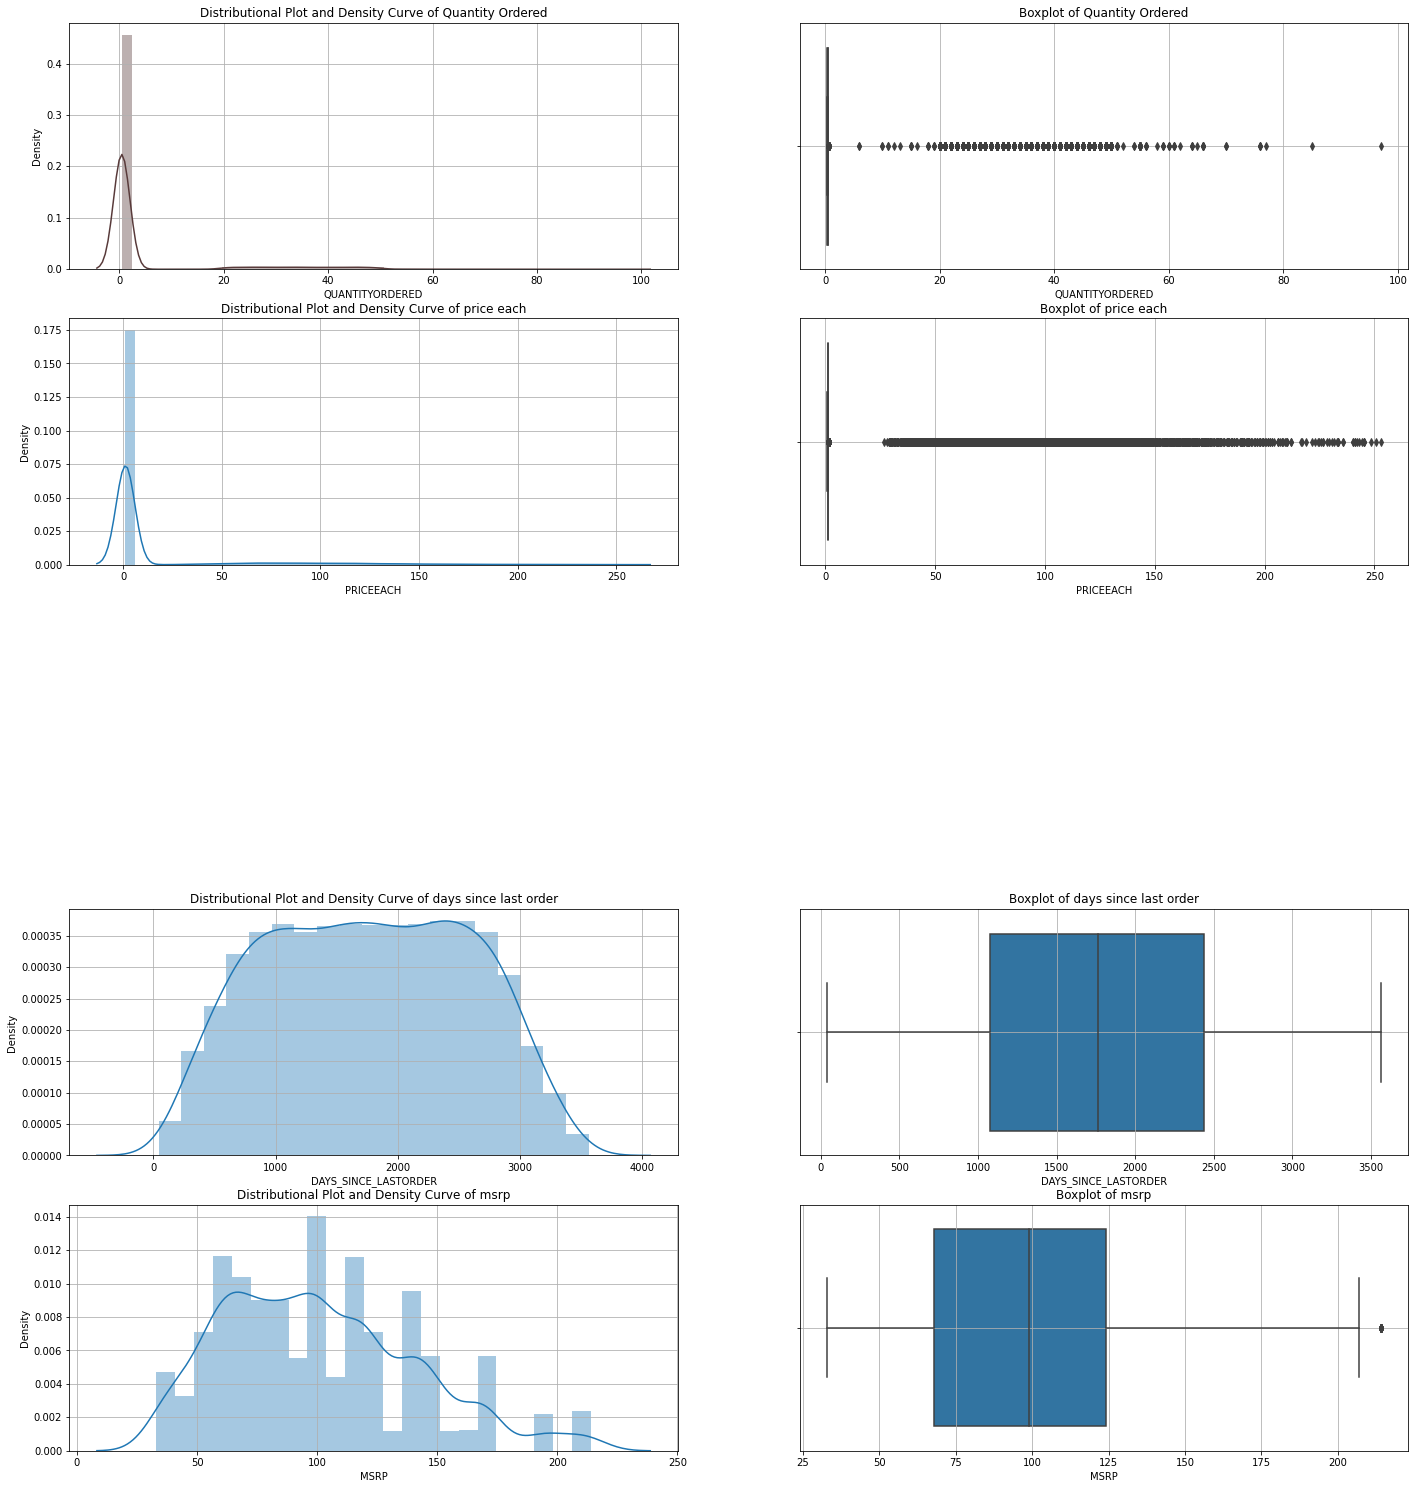

In [27]:
plt.figure(figsize=[24, 48])

plt.subplot(9, 2, 1)
sns.distplot(sales['QUANTITYORDERED'], colour="#583A3A", kde=True);
plt.title("Distributional Plot and Density Curve of Quantity Ordered")
plt.grid("True")
print('skew value of quantity ordered is', sales['QUANTITYORDERED'].skew())

plt.subplot(9, 2, 2)
sns.boxplot(sales['QUANTITYORDERED'], orient = "h");
plt.title("Boxplot of Quantity Ordered")
plt.grid("True")

plt.subplot(9, 2, 3)
sns.distplot(sales['PRICEEACH'], kde=True);
plt.title("Distributional Plot and Density Curve of price each")
plt.grid("True")
print('skew value of price each is', sales['PRICEEACH'].skew())

plt.subplot(9, 2, 4)
sns.boxplot(sales['PRICEEACH'], orient = "h");
plt.title("Boxplot of price each")
plt.grid("True")

plt.subplot(9, 2, 5)
sns.distplot(sales['SALES'], kde=True);
plt.title("Distributional Plot and Density Curve of sales")
plt.grid("True")
print('skew value of sales is', sales['SALES'].skew())

plt.subplot(9, 2, 6)
sns.boxplot(sales['SALES'], orient = "h");
plt.title("Boxplot of sales") 
plt.grid("True")

plt.subplot(9, 2, 7)
sns.distplot(sales['DAYS_SINCE_LASTORDER'], kde=True);
plt.title("Distributional Plot and Density Curve of days since last order")
plt.grid("True")
print('skew value of days since last order is', sales['DAYS_SINCE_LASTORDER'].skew())

plt.subplot(9, 2, 8)
sns.boxplot(sales['DAYS_SINCE_LASTORDER'], orient = "h");
plt.title("Boxplot of days since last order") 
plt.grid("True")

plt.subplot(9, 2, 9)
sns.distplot(sales['MSRP'], kde=True);
plt.title("Distributional Plot and Density Curve of msrp")
plt.grid("True")
print('skew value of msrp is', sales['MSRP'].skew())

plt.subplot(9, 2, 10)
sns.boxplot(sales['MSRP'], orient = "h");
plt.title("Boxplot of msrp")
plt.grid("True")

plt.show()

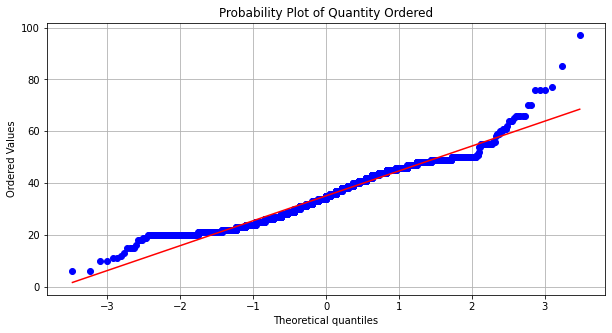

In [20]:
plt.figure(figsize=[10,5])

stats.probplot(sales['QUANTITYORDERED'], plot=plt);
plt.title("Probability Plot of Quantity Ordered")
plt.grid("True")

plt.show()

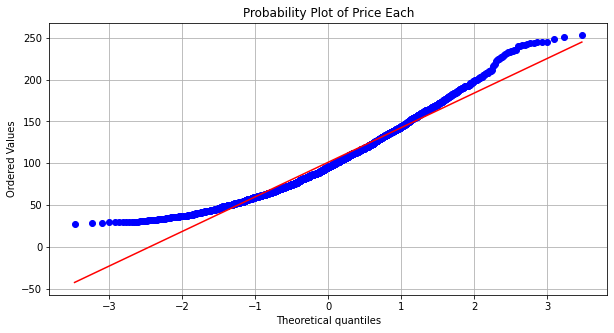

In [21]:
plt.figure(figsize=[10,5])

stats.probplot(sales['PRICEEACH'], plot=plt);
plt.title("Probability Plot of Price Each")
plt.grid("True")

plt.show()

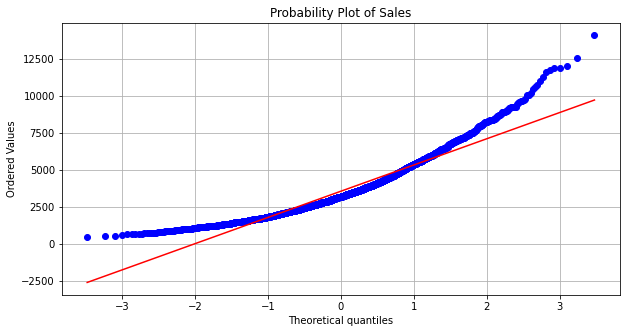

In [22]:
plt.figure(figsize=[10,5])

stats.probplot(sales['SALES'], plot=plt);
plt.title("Probability Plot of Sales")
plt.grid("True")

plt.show()

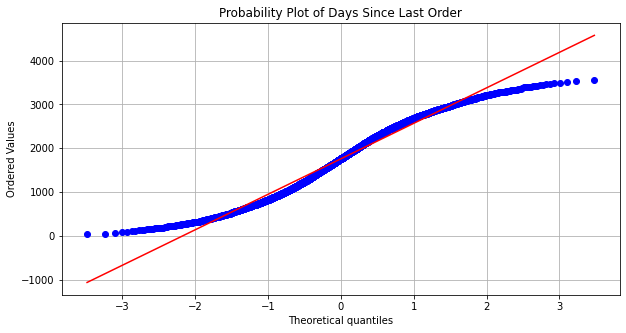

In [23]:
plt.figure(figsize=[10,5])

stats.probplot(sales['DAYS_SINCE_LASTORDER'], plot=plt);
plt.title("Probability Plot of Days Since Last Order")
plt.grid("True")

plt.show()

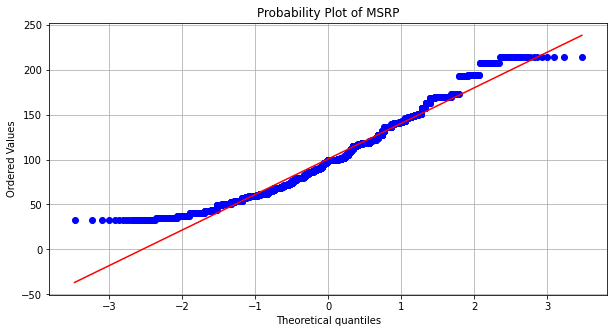

In [24]:
plt.figure(figsize=[10,5])

stats.probplot(sales['MSRP'], plot=plt);
plt.title("Probability Plot of MSRP")
plt.grid("True")

plt.show()

In [25]:
for column in sales[["PRODUCTLINE","STATUS"]]:
    print(column.upper(), ":", sales[column].nunique())
    print(sales[column].value_counts().sort_values())
    print("\n")

PRODUCTLINE : 7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64


STATUS : 6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64




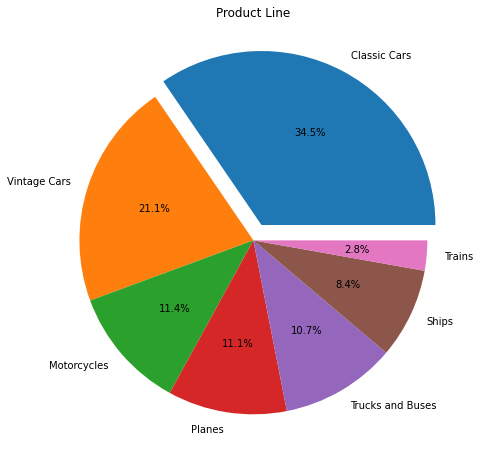

In [26]:
plt.figure(figsize=(12,8))
plt.pie(sales['PRODUCTLINE'].value_counts(),labels=sales['PRODUCTLINE'].value_counts().index,autopct='%.1f%%', explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Product Line")
plt.show()

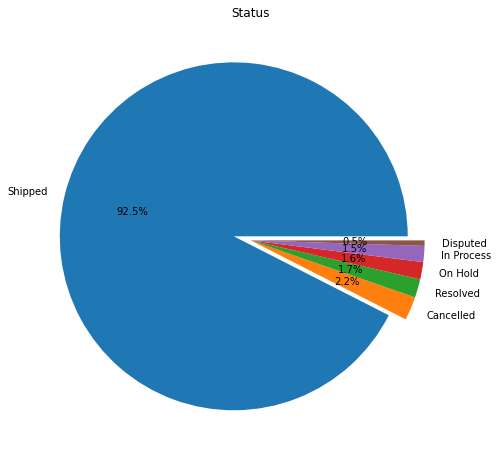

In [27]:
plt.figure(figsize=(12,8))
plt.pie(sales['STATUS'].value_counts(),labels=sales['STATUS'].value_counts().index,autopct='%1.1f%%', explode=[0.1,0.0,0.0,0.0,0.0,0.0])
plt.title("Status")
plt.show()

### Bivariate Analysis

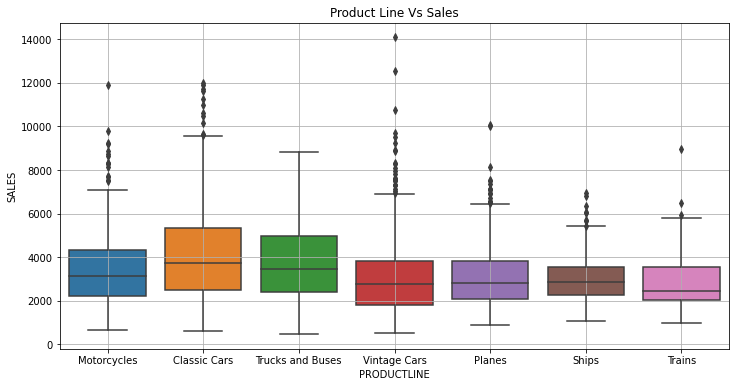

In [28]:
plt.figure(figsize=[12,6])

sns.boxplot(sales['PRODUCTLINE'],sales['SALES'])
plt.title("Product Line Vs Sales")
plt.grid("True")

plt.show()

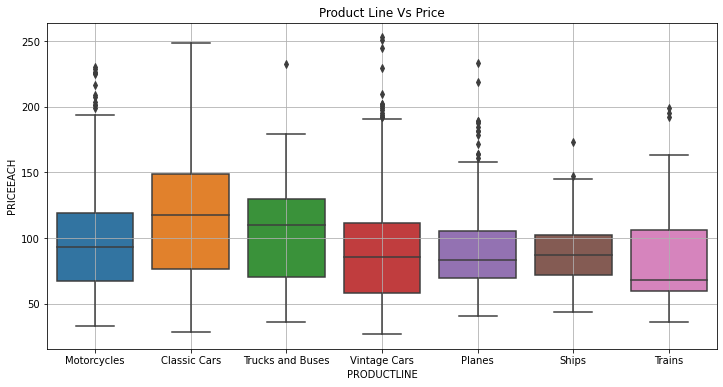

In [29]:
plt.figure(figsize=[12,6])

sns.boxplot(sales['PRODUCTLINE'],sales['PRICEEACH'])
plt.title("Product Line Vs Price")
plt.grid("True")

plt.show()

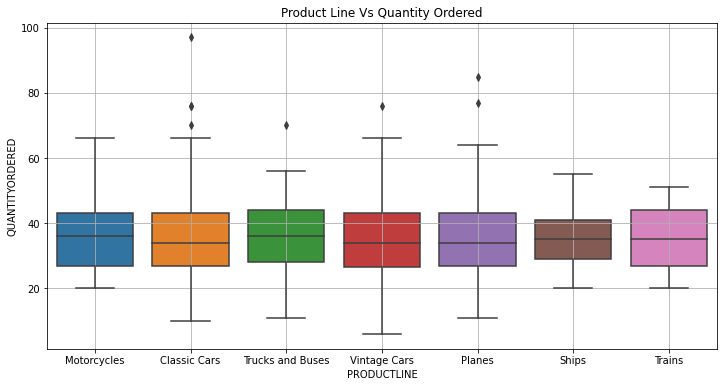

In [30]:
plt.figure(figsize=[12,6])

sns.boxplot(sales['PRODUCTLINE'],sales['QUANTITYORDERED'])
plt.title("Product Line Vs Quantity Ordered")
plt.grid("True")

plt.show()

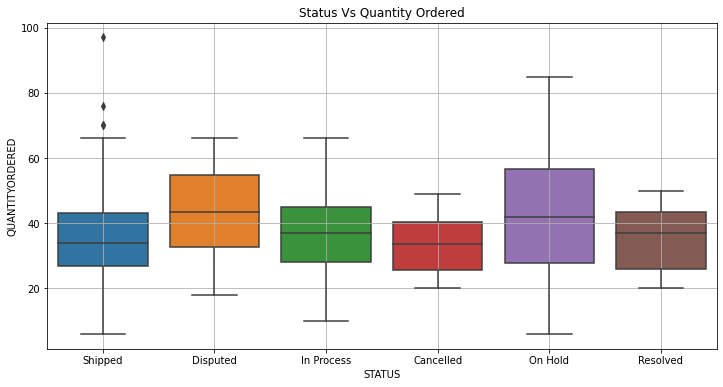

In [31]:
plt.figure(figsize=[12,6])

sns.boxplot(sales['STATUS'],sales['QUANTITYORDERED'])
plt.title("Status Vs Quantity Ordered")
plt.grid("True")

plt.show()

In [32]:
table = pd.crosstab(sales['PRODUCTLINE'], sales['DEALSIZE'])
table

DEALSIZE,Large,Medium,Small
PRODUCTLINE,,,
Classic Cars,95,518,336
Motorcycles,18,148,147
Planes,9,128,167
Ships,0,106,124
Trains,1,26,50
Trucks and Buses,7,173,115
Vintage Cars,22,250,307


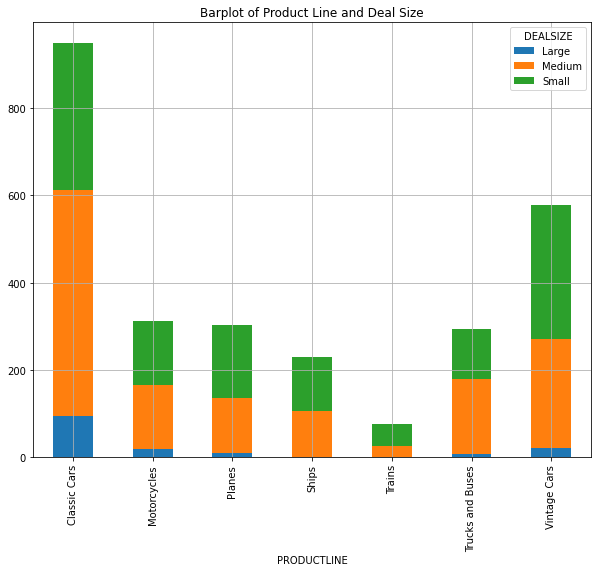

In [33]:
table.plot(kind = 'bar', figsize=(10,8), stacked=True)
plt.title("Barplot of Product Line and Deal Size")
plt.grid("True")
plt.show()

### Multivariate Analysis

#### Pair Plot

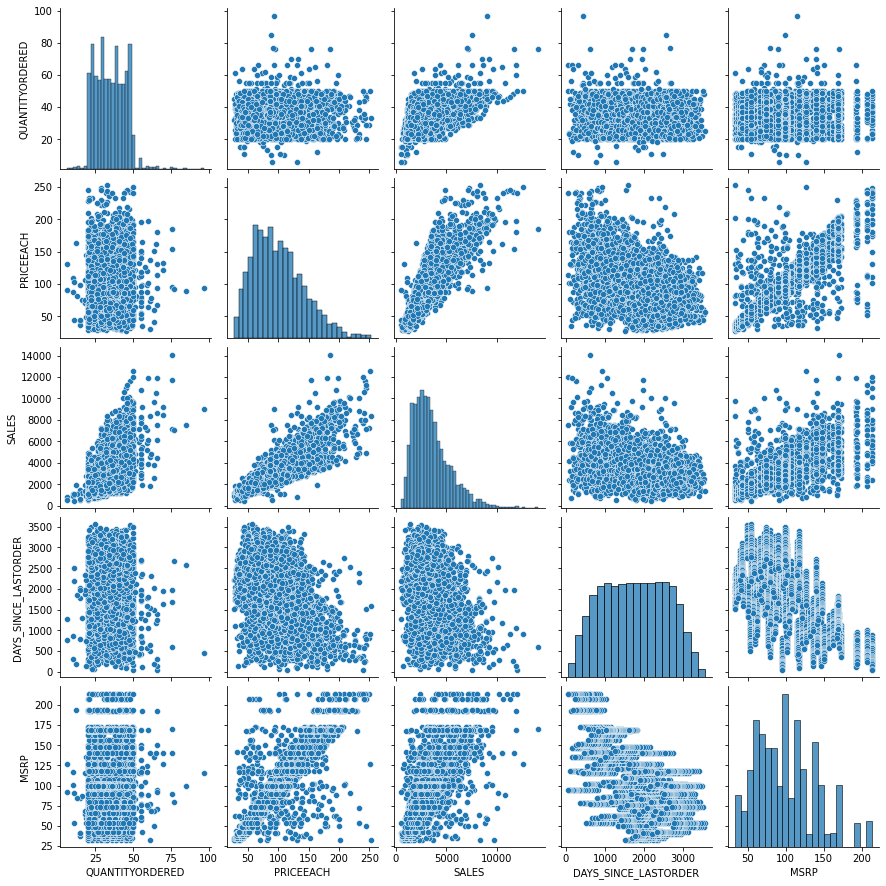

In [34]:
sns.pairplot(sales[['QUANTITYORDERED', 'PRICEEACH', 'SALES','DAYS_SINCE_LASTORDER','MSRP']]);

#### Correlation

In [35]:
corr = sales.corr()
corr

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


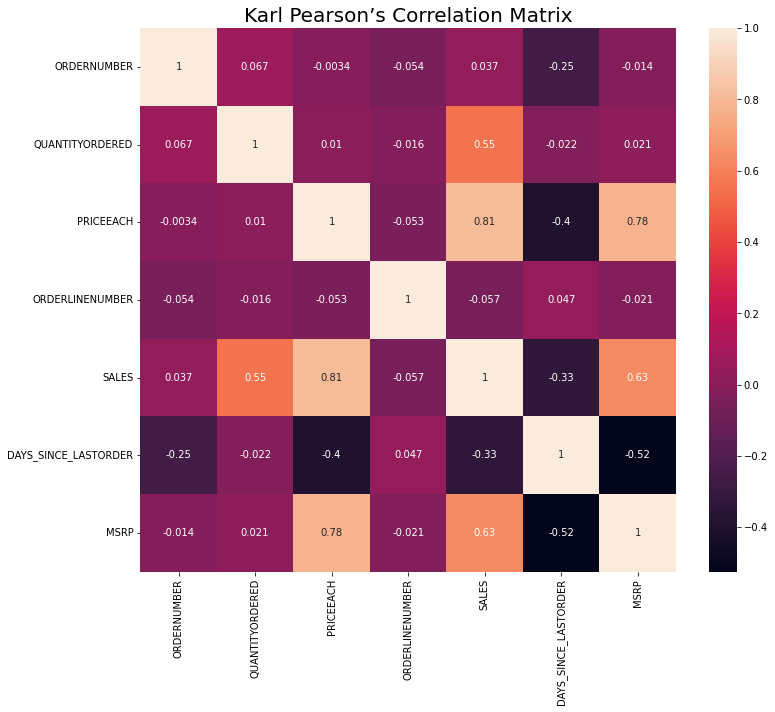

In [36]:
fig = plt.subplots(figsize=(12,10)) 
sns.heatmap(corr, annot=True)
plt.title("Karl Pearson’s Correlation Matrix", fontsize =20);

### Time Stamp

In [37]:
from datetime import datetime
now = datetime(2020,6,1)

### Total Price

In [38]:
sales['TotalPrice'] = sales['QUANTITYORDERED'] * sales['PRICEEACH']

### RFM Customer Segmentation

In [39]:
rfmTable = sales.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days, 'ORDERNUMBER': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['ORDERDATE'] = rfmTable['ORDERDATE'].astype(int)
rfmTable.rename(columns={'ORDERDATE': 'recency', 
                         'ORDERNUMBER': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

rfmTable

,recency,frequency,monetary_value
CUSTOMERNAME,,,
"AV Stores, Co.",197,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,266,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,189,7,24179.96
...,...,...,...
"Vida Sport, Ltd",276,31,117713.56
Vitachrome Inc.,209,25,88041.26
"Volvo Model Replicas, Co",195,19,75754.88


### Segmented RFM Table (4 Segments)

In [40]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [41]:
segmented_rfm = rfmTable

In [42]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [43]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))


segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CUSTOMERNAME,,,,,,
"AV Stores, Co.",197,51,157807.81,3,4,4
Alpha Cognac,65,20,70488.44,4,1,1
Amica Models & Co.,266,26,94117.26,1,2,3
"Anna's Decorations, Ltd",84,46,153996.13,2,4,4
Atelier graphique,189,7,24179.96,3,1,1


In [44]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",197,51,157807.81,3,4,4,344
Alpha Cognac,65,20,70488.44,4,1,1,411
Amica Models & Co.,266,26,94117.26,1,2,3,123
"Anna's Decorations, Ltd",84,46,153996.13,2,4,4,244
Atelier graphique,189,7,24179.96,3,1,1,311


The lowest recency is the most recent (4), highest frequency and monetary amounts (4).

### Best Customer

In [45]:
segmented_rfm[segmented_rfm['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,1,259,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,3,180,654858.06,4,4,4,444
La Rochelle Gifts,1,53,180124.90,4,4,4,444
The Sharp Gifts Warehouse,40,40,160010.27,4,4,4,444
Souveniers And Things Co.,3,46,151570.98,4,4,4,444
Salzburg Collectables,15,40,149798.63,4,4,4,444
Danish Wholesale Imports,47,36,145041.60,4,4,4,444
L'ordine Souveniers,22,39,142601.33,4,4,4,444
Reims Collectables,63,41,135042.94,4,4,4,444


### Customers on the verge of Churning

In [46]:
segmented_rfm[segmented_rfm['r_quartile'] <= 2 ].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CUSTOMERNAME,,,,,,,
"Australian Collectors, Co.",185,55,200995.41,2,4,4,244
Muscle Machine Inc,183,48,197736.94,2,4,4,244
"Dragon Souveniers, Ltd.",91,43,172989.68,2,4,4,244
"Anna's Decorations, Ltd",84,46,153996.13,2,4,4,244
"Saveley & Henriot, Co.",457,41,142874.25,1,4,4,144
Scandinavian Gift Ideas,90,38,134259.33,2,4,4,244
Technics Stores Inc.,148,34,120783.07,2,4,4,244
"Vida Sport, Ltd",276,31,117713.56,1,3,3,133
Suominen Souveniers,147,30,113961.15,2,3,3,233


### Lost Customer

In [47]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('recency', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CUSTOMERNAME,,,,,,,
"Double Decker Gift Stores, Ltd",496,12,36019.04,1,1,1,111
West Coast Collectables Co.,489,13,46084.64,1,1,1,111
Signal Collectibles Ltd.,477,15,50218.51,1,1,1,111
Daedalus Designs Imports,466,20,69052.41,1,1,1,111
CAF Imports,440,13,49642.05,1,1,1,111
Osaka Souveniers Co.,415,20,67605.07,1,1,1,111
Cambridge Collectables Co.,390,11,36163.62,1,1,1,111
Online Mini Collectables,265,15,57197.96,1,1,1,111
"Bavarian Collectables Imports, Co.",260,14,34993.92,1,1,1,111


### Loyal Customers

In [48]:
segmented_rfm[segmented_rfm['f_quartile'] >= 3 ].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CUSTOMERNAME,,,,,,,
Euro Shopping Channel,1,259,912294.11,4,4,4,444
Mini Gifts Distributors Ltd.,3,180,654858.06,4,4,4,444
"Australian Collectors, Co.",185,55,200995.41,2,4,4,244
Muscle Machine Inc,183,48,197736.94,2,4,4,244
La Rochelle Gifts,1,53,180124.90,4,4,4,444
"Dragon Souveniers, Ltd.",91,43,172989.68,2,4,4,244
Land of Toys Inc.,199,49,164069.44,3,4,4,344
The Sharp Gifts Warehouse,40,40,160010.27,4,4,4,444
"AV Stores, Co.",197,51,157807.81,3,4,4,344
